# Copyright Notice

© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

### **Important Note on Figures**
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, ***Nature Reviews Methods Primers***, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

### **Disclaimer**
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
from astropy.io import fits
from WaLSAtools import WaLSAtools, WaLSA_save_pdf

# Load FITS data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic data
time = hdul[1].data # Time array, saved in the second HDU (Extension HDU 1)
hdul.close()

# Computed POD modes using WaLSAtools
pod_results = WaLSAtools(
    signal=signal_3d, 
    time=time, 
    method='pod', 
    num_modes=10, 
    num_top_frequencies=10, 
    num_cumulative_modes=50, 
    timestep_to_reconstruct=1,
    num_modes_reconstruct=22
)

Starting POD analysis ....
Processing a 3D cube with shape (200, 130, 130).
POD analysis completed.
Top 10 frequencies and normalized power values:
[[0.1, 1.0], [0.15, 0.7], [0.25, 0.61], [0.2, 0.54], [0.3, 0.47], [0.5, 0.39], [0.35, 0.32], [0.4, 0.25], [0.45, 0.24], [0.55, 0.18]]
Total variance contribution of the first 10 modes: 96.01%

---- POD/SPOD Results Summary ----

input_data (ndarray, Shape: (200, 130, 130)): Original input data, mean subtracted (Shape: (Nt, Ny, Nx))
spatial_mode (ndarray, Shape: (200, 130, 130)): Reshaped spatial modes matching the dimensions of the input data (Shape: (Nmodes, Ny, Nx))
temporal_coefficient (ndarray, Shape: (200, 200)): Temporal coefficients associated with each spatial mode (Shape: (Nmodes, Nt))
eigenvalue (ndarray, Shape: (200,)): Eigenvalues corresponding to singular values squared (Shape: (Nmodes))
eigenvalue_contribution (ndarray, Shape: (200,)): Eigenvalue contribution of each mode (Shape: (Nmodes))
cumulative_eigenvalues (list, Shape: 

In [2]:
input_data = pod_results['input_data']
eigenvalue_contribution = pod_results['eigenvalue_contribution']
combined_welch_psd = pod_results['combined_welch_psd']
frequencies = pod_results['frequencies']
combined_welch_significance = pod_results['combined_welch_significance']
cumulative_eigenvalues = pod_results['cumulative_eigenvalues']
reconstructed = pod_results['reconstructed']

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/FigS6_POD_egenvalues_powerspectrum.pdf'


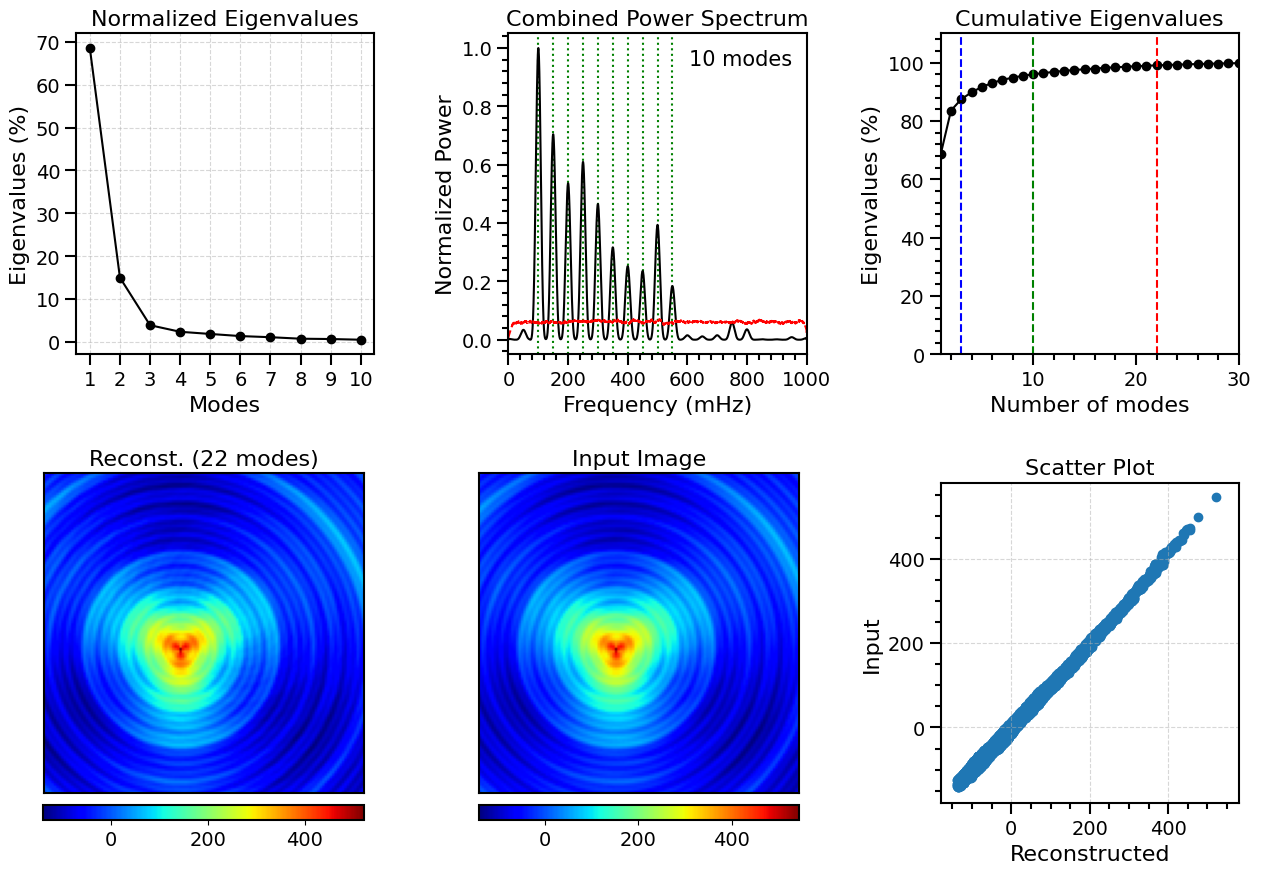

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Setting global parameters for the plots
plt.rcParams.update({
    'font.size': 14,          # Global font size
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 14,    # X-axis tick label font size
    'ytick.labelsize': 14,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 17,   # Figure title font size
    'axes.grid': False,       # Turn off grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
})

fig = plt.figure(figsize=(15, 10))

# Create subplots with GridSpec
gs1 = gridspec.GridSpec(2, 3, figure=fig, wspace=0.45, hspace=0.4)

# Plot normalized eigenvalues
ax_ev = plt.subplot(gs1[0, 0])
ax_ev.set_title(f'Normalized Eigenvalues')
mode_nums = np.arange(1,11)
ax_ev.plot(mode_nums, 100*eigenvalue_contribution[0:10],'k-o')
ax_ev.set_xlabel('Modes')
ax_ev.set_ylabel('Eigenvalues (%)')
ax_ev.grid(True)
ax_ev.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_ev.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
ax_ev.tick_params(axis='both', labelsize=14)
for spine in ax_ev.spines.values():
    spine.set_linewidth(1.5)

# Plot combined power spectrum
ax_freq = plt.subplot(gs1[0, 1])
pre_defined_freq = [100,150,200,250,300,350,400,450,500,550]
for freq in pre_defined_freq:
    ax_freq.axvline(x=freq, color='green', linestyle=':', linewidth=1.5)
ax_freq.plot(frequencies*1000.,combined_welch_psd/np.max(combined_welch_psd),'k')
ax_freq.plot(frequencies*1000., combined_welch_significance, 'r--', label='95% Significance Threshold')
ax_freq.set_title(f'Combined Power Spectrum')
ax_freq.set_xlabel('Frequency (mHz)')
ax_freq.set_ylabel('Normalized Power')
ax_freq.grid(False)
ax_freq.xaxis.set_minor_locator(AutoMinorLocator(5))
ax_freq.yaxis.set_minor_locator(AutoMinorLocator(5))
ax_freq.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
ax_freq.tick_params(axis='both', labelsize=14)
for spine in ax_freq.spines.values():
    spine.set_linewidth(1.5)
ax_freq.set_xlim(0,1000)
ax_freq.text(0.95, 0.95, '10 modes', transform=ax_freq.transAxes, fontsize=15, verticalalignment='top', horizontalalignment='right')

# Plot cumulative eigenvalues
ax_freq = plt.subplot(gs1[0, 2])
ax_freq.plot(cumulative_eigenvalues,'k-o')
ax_freq.set_title(f'Cumulative Eigenvalues')
ax_freq.set_xlabel('Number of modes')
ax_freq.set_ylabel('Eigenvalues (%)')
ax_freq.grid(False)
ax_freq.xaxis.set_minor_locator(AutoMinorLocator(5))
ax_freq.yaxis.set_minor_locator(AutoMinorLocator(5))
ax_freq.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
ax_freq.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
ax_freq.tick_params(axis='both', labelsize=14)
for spine in ax_freq.spines.values():
    spine.set_linewidth(1.5)
ax_freq.set_xlim(1,30)
ax_freq.set_ylim(0,110)

# Identify indices where 90% and 95% is reached
thresholds = [84, 96, 99]
colors = ['blue', 'green', 'red']
for threshold, color in zip(thresholds, colors):
    index = next(i for i, v in enumerate(cumulative_eigenvalues) if v >= threshold)
    ax_freq.axvline(x=index, color=color, linestyle='--', label=f'{threshold}% at mode {index}')

# Plot reconstructed image for frame number 1 (using the first 22 modes)
im_recon = plt.subplot(gs1[1, 0])
im_recon.set_title('Reconst. (22 modes)')
img = im_recon.imshow(reconstructed, cmap='jet', aspect='equal', origin='lower')
im_recon.set_xticks([])  # Remove x ticks
im_recon.set_yticks([])  # Remove y ticks
for spine in im_recon.spines.values():
        spine.set_linewidth(1.5)
im_recon.set_position([0.05, 0.12, 0.32, 0.32])  # Adjust these values (left, bottom, width, height)
# Create a new axis for the colorbar and set its position
cax = fig.add_axes([0.103, 0.093, 0.2135, 0.015])  # Adjust these values (left, bottom, width, height)
colorbar = plt.colorbar(img, cax=cax, orientation='horizontal')
colorbar.outline.set_linewidth(1.5)

# Plot input image (mean subtracted) for frame number 1 
im_input = plt.subplot(gs1[1, 1])
im_input.set_title('Input Image')
img2 = im_input.imshow(input_data[1, :, :], cmap='jet', aspect='equal', origin='lower')
im_input.set_xticks([])  # Remove x ticks
im_input.set_yticks([])  # Remove y ticks
for spine in im_input.spines.values():
        spine.set_linewidth(1.5)
im_input.set_position([0.34, 0.12, 0.32, 0.32])  # Adjust these values (left, bottom, width, height)
# Create a new axis for the colorbar and set its position
cax2 = fig.add_axes([0.3935, 0.093, 0.2135, 0.015])  # Adjust these values (left, bottom, width, height)
colorbar = plt.colorbar(img2, cax=cax2, orientation='horizontal')
colorbar.outline.set_linewidth(1.5)

# Add scatter plot
ax_scatter = plt.subplot(gs1[1, 2])
ax_scatter.set_title('Scatter Plot')
ax_scatter.scatter(reconstructed, input_data[1, :, :])
ax_scatter.set_xlabel('Reconstructed')
ax_scatter.set_ylabel('Input')
ax_scatter.grid(True)
ax_scatter.xaxis.set_minor_locator(AutoMinorLocator(4))
ax_scatter.yaxis.set_minor_locator(AutoMinorLocator(4))
ax_scatter.xaxis.set_major_locator(MaxNLocator(nbins=4))
ax_scatter.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax_scatter.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
ax_scatter.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
ax_scatter.tick_params(axis='both', labelsize=14)
for spine in ax_scatter.spines.values():
    spine.set_linewidth(1.5)
ax_scatter.set_xlim(-180,580)
ax_scatter.set_ylim(-180,580)

# Save the figure as a PDF
pdf_path = 'Figures/FigS6_POD_eigenvalues_powerspectrum.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()